In [15]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df_btc = pd.read_csv("coin_Bitcoin.csv")
df_eth = pd.read_csv("coin_Ethereum.csv")
df_dog = pd.read_csv("coin_Dogecoin.csv")
df_car = pd.read_csv("coin_Cardano.csv")
df_sol = pd.read_csv("coin_Solana.csv")

In [3]:
df_crypto= pd.concat([df_btc, df_eth,df_dog, df_car, df_sol])

In [4]:
df_crypto.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
447,448,Solana,SOL,2021-07-02 23:59:59,34.031786,31.479924,33.306310,34.020482,4.402988e+08,9.275257e+09
448,449,Solana,SOL,2021-07-03 23:59:59,35.404770,33.298475,34.015575,34.478816,3.270200e+08,9.400216e+09
449,450,Solana,SOL,2021-07-04 23:59:59,35.502372,33.555737,34.495117,34.310601,3.034205e+08,9.354354e+09
450,451,Solana,SOL,2021-07-05 23:59:59,34.461824,32.482692,34.282550,32.984588,3.138393e+08,8.992833e+09
451,452,Solana,SOL,2021-07-06 23:59:59,34.978319,32.930307,32.930307,34.269140,3.653360e+08,9.343050e+09


In [62]:
df_crypto.shape

(9737, 10)

In [63]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9737 entries, 0 to 451
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        9737 non-null   int64  
 1   Name       9737 non-null   object 
 2   Symbol     9737 non-null   object 
 3   Date       9737 non-null   object 
 4   High       9737 non-null   float64
 5   Low        9737 non-null   float64
 6   Open       9737 non-null   float64
 7   Close      9737 non-null   float64
 8   Volume     9737 non-null   float64
 9   Marketcap  9737 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 836.8+ KB


In [39]:
df_crypto.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9.737000e+03,9.737000e+03
mean,1198.069118,2206.392811,2073.950786,2143.601456,2147.256859,5.173478e+09,4.807778e+10
std,799.134457,7175.107253,6708.456899,6959.863871,6967.102449,1.259210e+10,1.316810e+11
min,1.000000,0.000089,0.000085,0.000087,0.000087,0.000000e+00,0.000000e+00
25%,496.000000,0.005272,0.004553,0.004964,0.004970,1.150800e+07,3.305161e+08
50%,1105.000000,11.806600,11.152600,11.442200,11.471000,8.102290e+07,3.778049e+09
75%,1826.000000,574.038025,525.228027,551.640015,556.140015,3.409479e+09,2.932271e+10
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [55]:
df_crypto.isna().any()

SNo          False
Name         False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
dtype: bool

In [53]:
df_crypto.isna().any(axis=1).sum()

0

In [54]:
df_crypto.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

<AxesSubplot:>

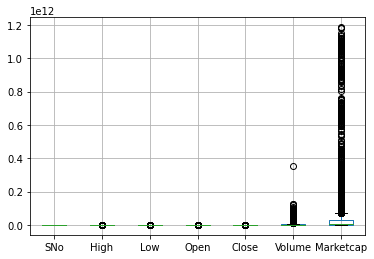

In [65]:
df_crypto.boxplot()

In [66]:
Q1 = df_crypto.quantile(0.25)
Q3 = df_crypto.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SNo          1.330000e+03
High         5.740328e+02
Low          5.252235e+02
Open         5.516351e+02
Close        5.561350e+02
Volume       3.397971e+09
Marketcap    2.899219e+10
dtype: float64


In [68]:
df_crypto.shape

(9737, 10)

In [70]:
df_out = df_crypto[~((df_crypto < (Q1-1.5 * IQR)) |(df_crypto > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.pd.DataFrame

/var/folders/rl/rx4_64yd2mxg15bcxfmhj8m00000gn/T/ipykernel_1296/236017468.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df_crypto[~((df_crypto < (Q1-1.5 * IQR)) |(df_crypto > (Q3 + 1.5 * IQR))).any(axis=1)]


AttributeError: 'DataFrame' object has no attribute 'pd'

In [9]:
df_crypto['Date'] = pd.to_datetime(df_crypto['Date'])

In [12]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9737 entries, 0 to 451
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        9737 non-null   int64         
 1   Name       9737 non-null   object        
 2   Symbol     9737 non-null   object        
 3   Date       9737 non-null   datetime64[ns]
 4   High       9737 non-null   float64       
 5   Low        9737 non-null   float64       
 6   Open       9737 non-null   float64       
 7   Close      9737 non-null   float64       
 8   Volume     9737 non-null   float64       
 9   Marketcap  9737 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 836.8+ KB


In [19]:
df1 = pd.DataFrame({'date': np.array([datetime.datetime(2021, 
                    12, i+1) for i in range(20)]),
                   'blogs_read': [4, 6, 5, 8, 15, 13, 18, 6, 5, 
                  3, 15, 14, 19, 21, 15, 19, 25, 24, 16, 26]})

df2 = pd.DataFrame({'date': np.array([datetime.datetime(2021, 
                     12, i+1)
 for i in range(20)]),
                   'blogs_unread': [1, 1, 2, 3, 3, 3, 4, 3, 2,     
                    3, 4, 7, 5, 3, 2, 4, 3, 6, 1, 2]})

In [20]:
df1.head()

,date,blogs_read
0,2021-12-01,4
1,2021-12-02,6
2,2021-12-03,5
3,2021-12-04,8
4,2021-12-05,15


In [21]:
df_btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


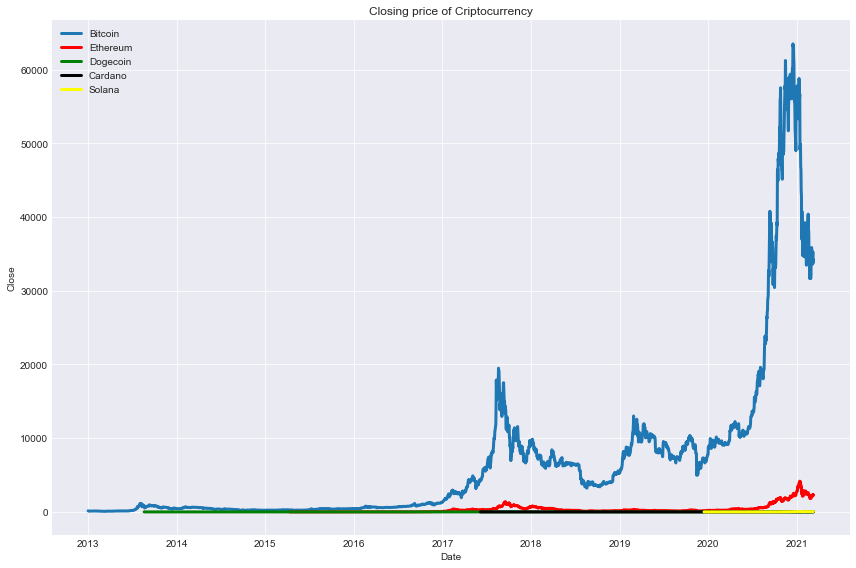

In [31]:
fig = plt.figure(figsize=(12, 8))

plt.plot(df_btc.Date, df_btc.Close, label='Bitcoin', 
         linewidth=3)
plt.plot(df_eth.Date, df_eth.Close, color='red', 
         label='Ethereum', linewidth=3)
plt.plot(df_dog.Date, df_dog.Close, color='green', 
         label='Dogecoin', linewidth=3)
plt.plot(df_car.Date, df_car.Close, color='black', 
         label='Cardano', linewidth=3)
plt.plot(df_sol.Date, df_sol.Close, color='yellow', 
         label='Solana', linewidth=3)

# Add title and labels

plt.title('Closing price of Criptocurrency')
plt.xlabel('Date')
plt.ylabel('Close')

# Add legend
plt.xticks(["2013-04-29 23:59:59", "2014-04-29 23:59:59","2015-04-29 23:59:59","2016-04-29 23:59:59","2017-04-29 23:59:59",
            "2018-04-29 23:59:59","2019-04-29 23:59:59","2020-04-29 23:59:59","2021-04-29 23:59:59"], [2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 

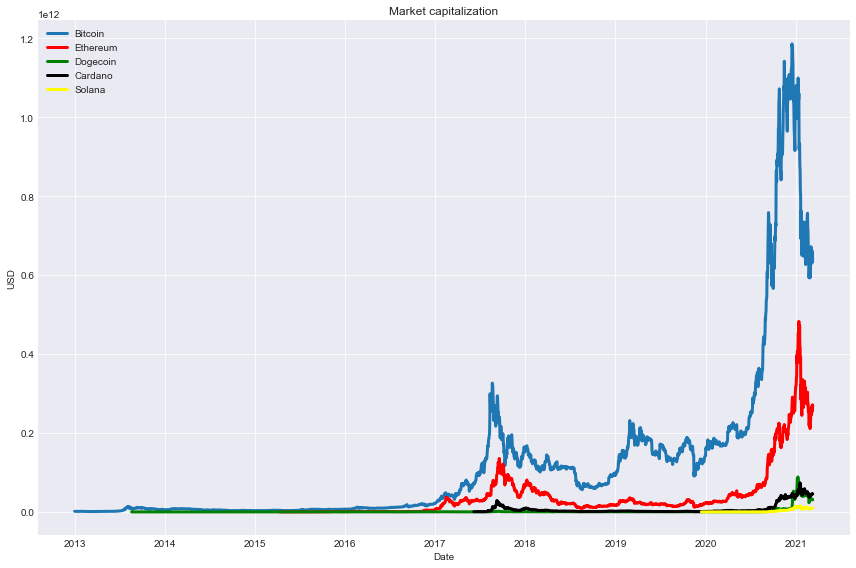

In [32]:
fig = plt.figure(figsize=(12, 8))

plt.plot(df_btc.Date, df_btc.Marketcap, label='Bitcoin', 
         linewidth=3)
plt.plot(df_eth.Date, df_eth.Marketcap, color='red', 
         label='Ethereum', linewidth=3)
plt.plot(df_dog.Date, df_dog.Marketcap, color='green', 
         label='Dogecoin', linewidth=3)
plt.plot(df_car.Date, df_car.Marketcap, color='black', 
         label='Cardano', linewidth=3)
plt.plot(df_sol.Date, df_sol.Marketcap, color='yellow', 
         label='Solana', linewidth=3)

# Add title and labels

plt.title('Market capitalization')
plt.xlabel('Date')
plt.ylabel('USD')

# Add legend
plt.xticks(["2013-04-29 23:59:59", "2014-04-29 23:59:59","2015-04-29 23:59:59","2016-04-29 23:59:59","2017-04-29 23:59:59",
            "2018-04-29 23:59:59","2019-04-29 23:59:59","2020-04-29 23:59:59","2021-04-29 23:59:59"], [2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 